In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
VF_Jaccard = pd.read_csv("../../Output/variance_filtering_results/variance_jaccard_matrix_k200.csv", index_col=0)
MI_Jaccard = pd.read_csv("../../Output/mutual_information_results/jaccard_matrix.csv", index_col=0)
L1_Jaccard = pd.read_csv("../../Output/l1_results/jaccard_matrix.csv", index_col=0)

In [3]:
VF_Jaccard

,Fold_1,Fold_2,Fold_3,Fold_4,Fold_5
Fold_1,1.000000,0.941748,0.932367,0.932367,0.951220
Fold_2,0.941748,1.000000,0.941748,0.941748,0.951220
Fold_3,0.932367,0.941748,1.000000,0.941748,0.951220
Fold_4,0.932367,0.941748,0.941748,1.000000,0.941748
Fold_5,0.951220,0.951220,0.951220,0.941748,1.000000


In [5]:
VF_accuracy = [1, 1, 0.994, 1, 0.988]
MI_accuracy = [1, 1, 0.994, 1, 0.994]
L1_accuracy = [1, 1, 0.994, 1, 0.994]

In [6]:
def getFoldAvg(jaccard_df):
    jaccard_matrix = jaccard_df.values
    fold_dict = {1: [], 2: [], 3: [], 4: [], 5: []}
    for i in range(5):
        for j in range(5):
            if i == j:
                continue
            else:
                fold_dict[i+1].append(jaccard_matrix[i][j])
    fold_avgs = {fold:np.mean(fold_dict[fold]) for fold in fold_dict}
    return fold_avgs

In [7]:
L1_Jaccard_Avg_p_Fold = getFoldAvg(L1_Jaccard)
MI_Jaccard_Avg_p_Fold = getFoldAvg(MI_Jaccard)
VF_Jaccard_Avg_p_Fold = getFoldAvg(VF_Jaccard)

In [8]:
VF_Jaccard_Avg_p_Fold

{1: np.float64(0.939425346131891),
 2: np.float64(0.944115557660431),
 3: np.float64(0.9417704518961609),
 4: np.float64(0.939402467051264),
 5: np.float64(0.948851527350225)}

In [9]:
Jaccard_vs_Accuracy_df = pd.DataFrame({"Fold": [1, 2, 3, 4, 5],
                   "VF_Accuracy": VF_accuracy, "VF_Jaccard": [VF_Jaccard_Avg_p_Fold[i] for i in range(1,6)],
                   "MI_Accuracy": MI_accuracy, "MI_Jaccard": [MI_Jaccard_Avg_p_Fold[i] for i in range(1,6)],
                   "L1_Accuracy": L1_accuracy, "L1_Jaccard": [L1_Jaccard_Avg_p_Fold[i] for i in range(1,6)]
                  })

In [10]:
Jaccard_vs_Accuracy_df

,Fold,VF_Accuracy,VF_Jaccard,MI_Accuracy,MI_Jaccard,L1_Accuracy,L1_Jaccard
0,1,1.000,0.939425,1.000,0.756618,1.000,0.724478
1,2,1.000,0.944116,1.000,0.729768,1.000,0.750424
2,3,0.994,0.941770,0.994,0.762301,0.994,0.729608
3,4,1.000,0.939402,1.000,0.756453,1.000,0.760552
4,5,0.988,0.948852,0.994,0.760301,0.994,0.682367


In [11]:
Jaccard_vs_Accuracy_Scatter = []
for i in range(1,6):
    Jaccard_vs_Accuracy_Scatter.append([i, 'VF', VF_Jaccard_Avg_p_Fold[i], VF_accuracy[i-1]])
    Jaccard_vs_Accuracy_Scatter.append([i, 'MI', MI_Jaccard_Avg_p_Fold[i], MI_accuracy[i-1]])
    Jaccard_vs_Accuracy_Scatter.append([i, 'L1', L1_Jaccard_Avg_p_Fold[i], L1_accuracy[i-1]])

Jaccard_vs_Accuracy_Scatter_df = pd.DataFrame(Jaccard_vs_Accuracy_Scatter, columns = ['Fold', 'Method', 'Jaccard_Avg', 'Accuracy'])
color = {'VF': 'blue', 'MI': 'green', 'L1':'purple'}
Jaccard_vs_Accuracy_Scatter_df['Color'] = Jaccard_vs_Accuracy_Scatter_df['Method'].map(color)
Jaccard_vs_Accuracy_Scatter_df

,Fold,Method,Jaccard_Avg,Accuracy,Color
0,1,VF,0.939425,1.000,blue
1,1,MI,0.756618,1.000,green
2,1,L1,0.724478,1.000,purple
3,2,VF,0.944116,1.000,blue
4,2,MI,0.729768,1.000,green
5,2,L1,0.750424,1.000,purple
6,3,VF,0.941770,0.994,blue
7,3,MI,0.762301,0.994,green
8,3,L1,0.729608,0.994,purple
9,4,VF,0.939402,1.000,blue


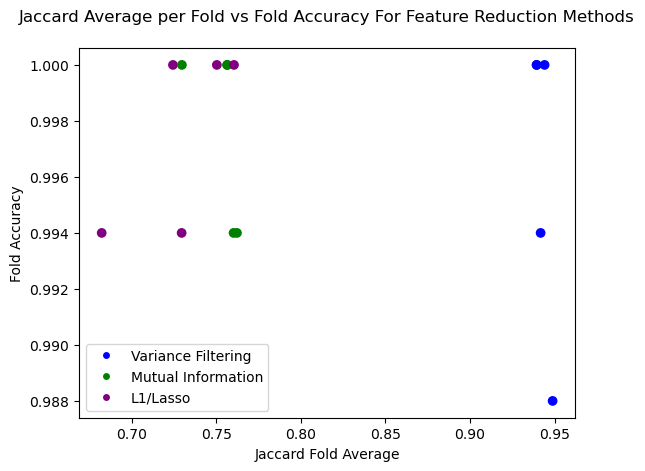

In [17]:
plt.scatter(Jaccard_vs_Accuracy_Scatter_df['Jaccard_Avg'], Jaccard_vs_Accuracy_Scatter_df['Accuracy'], c=Jaccard_vs_Accuracy_Scatter_df['Color'])

plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', label='Variance Filtering'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', label='Mutual Information'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='purple', label='L1/Lasso')
])

plt.title("Jaccard Average per Fold vs Fold Accuracy For Feature Reduction Methods", y=1.05)
plt.xlabel('Jaccard Fold Average')
plt.ylabel('Fold Accuracy')
plt.savefig("../../Output/jaccard_vs_accuracy.png", dpi=300, bbox_inches='tight')

In [16]:
plt.savefig("../../Output/jaccard_vs_accuracy.png", dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

In [14]:
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>